https://github.com/Hyun-Jun-Lee/Credit-risk-prediction/blob/master/Credit_risk__final%20(1).ipynb

In [ ]:
# 구글 코랩의 drive 모듈을 가져옵니다.
from google.colab import drive

# 구글 드라이브를 마운트하는 함수입니다. 실행 후 구글 계정 인증을 하게 되면 구글 드라이브에 접근할 수 있게 됩니다.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

# 필요한 라이브러리들을 불러옵니다
import pandas as pd      # 데이터프레임과 시리즈 데이터 구조를 제공하는 판다스 라이브러리
import numpy as np       # 과학 계산을 위한 넘파이 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 맷플롯립 라이브러리
import seaborn as sns    # 시각화를 위한 시본 라이브러리

# 경고 메시지 무시를 위한 설정
import warnings
warnings.filterwarnings('ignore')

# 시각화 스타일을 "seaborn-paper"로 설정합니다.
plt.style.use('seaborn-paper')

데이터 분석 및 머신러닝 모델 설명에 사용되는 도구를 설치합니다.

In [ ]:
import sys

# 'google.colab'이 sys.modules에 있을경우 Google Colab에서 실행 중이라고 판단합니다.
if 'google.colab' in sys.modules:
    # Google Colab에서 필요한 패키지들을 설치합니다.

    # Category Encoders : 범주형 변수를 수치형으로 변환하는데 사용되는 패키지
    !pip install category_encoders==2.*
    # ELI5 : 머신러닝 모델에 대한 설명을 생성해주는 패키지
    !pip install eli5
    # Pandas-Profiling : 데이터 프로파일링을 위한 패키지
    !pip install pandas-profiling==2.*
    # PDPbox : PDP (Partial Dependence Plots)를 그리는 패키지
    !pip install pdpbox
    # SHAP : SHAP(SHapley Additive exPlanations) 값을 이용해 모델 설명을 돕는 패키지
    !pip install shap

  Using cached visions-0.7.1-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 0.0.dev0 requires visions[type_image_path]==0.7.5, but you have visions 0.7.1 which is incompatible.


데이터를 가져옵니다.

변수 설명

- erson_age : 대출 당시 나이
- person_income : 연간 소득
- person_home_ownership : 주택 소융 유형 (RENT / MORTGAGE / OWN / OTHER)
- person_emp_length : 일한 기간(연 단위)
- loan_intent : 대출 목적 ( EDUCATION / MEDICAL / VENTURE / PERSONAL/ DEBTCONSOLIDATION)
- loan_grade : 대출 등급 (A/B/C/D/E/F/G)
- loan_amnt : 대출 총액
- loan_int_rate : 이자율
- loan_percent_income : 연소득과 대출금의 비율
- cb_person_default_on_file : 과거 채무 불이행 여부
- cb_person_gist_length : 첫 대출 받은 후 지난 기간(연 단위)

**Target**

**- loan_stats : 0은 Non-default, 1은 default**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/비즈빅4기/4/credit_risk_dataset.csv')
df.head() # 데이터프레임(df)의 처음 5개 행을 출력합니다.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
import io
import pandas as pd

In [ ]:
#노트북에 있는 파일을 드라이브에 올려주는 코드입니다

# from google.colab import files
# uploaded = files.upload()

# **Pandas - Profiling**

노션 실습 보고서의 Pandas - Profiling 참고

In [ ]:
# GitHub 리포지토리에서 판다스프로파일링(pandas-profiling)의 최신 버전을 설치합니다.
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 설치된 판다스프로파일링 패키지에 대한 정보를 출력합니다.
!pip show pandas_profiling

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires visions[type_image_path]==0.7.1, but you have visions 0.7.5 which is incompatible.


Name: pandas-profiling
Version: 2.13.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: attrs, confuse, htmlmin, jinja2, joblib, matplotlib, missingno, numpy, pandas, phik, requests, scipy, seaborn, tangled-up-in-unicode, tqdm, visions
Required-by: 


In [ ]:
import pandas_profiling
pr=df.profile_report()
pr

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import sklearn
import xgboost
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import TargetEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt
from pdpbox import pdp

## Baselline

### 평가지표

- Accuracy : 전체 예측한 것중 맞게 예측한 비율
- AUC : ROC 곡선 아래 면적 (0.8 이상이면 좋은 모델)

데이터셋의 베이스라인(기준) 성능을 설정하고 이를 바탕으로 기준 정확도와 기준 ROC AUC 점수를 계산하는 코드입니다.

일반적으로 머신러닝 모델을 개발할 때 기준 성능을 설정하여 모델이 기대하는 성능 이상을 나타내는지 확인합니다.

이 코드에서는 loan_status 열의 최빈값을 사용하여 베이스라인을 설정합니다.

그런 다음 기준 정확도 및 기준 ROC AUC 점수를 계산하여 출력합니다."

In [ ]:
# 타겟 데이터 loan_status 열의 비율 확인
df['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

In [ ]:
# 베이스라인 설정: loan_status 열의 최빈값(가장 많이 등장하는 값)을 구합니다.
major = df['loan_status'].mode()[0]
baseline = [major] * len(df)

# 정확도 측정을 위한 라이브러리 가져오기
from sklearn.metrics import accuracy_score

# 기준 정확도 (baseline accuracy) 계산하기 및 출력하기
print("baseline accuracy : ", accuracy_score(df['loan_status'], baseline))

# 기준 ROC AUC 점수(baseline roc_auc_score)를 계산하려면 라이브러리를 불러와야 합니다.
from sklearn.metrics import roc_auc_score
print ('baseline roc_auc_score ', roc_auc_score(df['loan_status'], baseline))

baseline accuracy :  0.7818360394094718
baseline roc_auc_score  0.5


## Feature Engineering

In [ ]:
# 전처리 정리
'''
# 'person_age' : 이상치 행에 -100 해주기
for i in range(len(df['person_age'])):
    if df['person_age'][i] > 100:
        df['person_age'][i] -= 100
    else:
        continue

# 'person_age' : 대부분 20대~50대 / 60세 이상 데이터는 80개 뿐으로 제외
df = df[df['person_age']<60]

# 'person_income' : 대부분 300000 이하 / 300000 이상 제외
df = df[df['person_income']<300000]

# 'cb_person_default_on_file' Y = 1, N = 0
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace('Y',1)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace('N',0)

# 'per_emp_length' : 결측치를 중앙 값으로 대체 후 범위 조정
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df = df[df['person_emp_length']<=30]

# 'loan_int_rate' : 결측치를 중앙값으로 대체
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# 'loan_grade' : Ordinal Encoding
temp_dict = {"A": 7, "B": 6, "C": 5, "D": 4, "E" : 3, "F" : 2, "G" : 1}
df["loan_grade"] = df['loan_grade'].map(temp_dict)

# 'month_income' : 월급 컬럼 생성
df['month_income'] = df['person_income'] / 12
df['month_income'] = df['month_income'].astype(int)

# 'person_home_ownership' , 'loan_intent' : One-hot-Encoding
df = pd.get_dummies(df)
'''

'\n# \'person_age\' : 이상치 행에 -100 해주기\nfor i in range(len(df[\'person_age\'])):\n    if df[\'person_age\'][i] > 100:\n        df[\'person_age\'][i] -= 100\n    else:\n        continue\n\n# \'person_age\' : 대부분 20대~50대 / 60세 이상 데이터는 80개 뿐으로 제외\ndf = df[df[\'person_age\']<60]\n\n# \'person_income\' : 대부분 300000 이하 / 300000 이상 제외\ndf = df[df[\'person_income\']<300000]\n\n# \'cb_person_default_on_file\' Y = 1, N = 0\ndf[\'cb_person_default_on_file\'] = df[\'cb_person_default_on_file\'].replace(\'Y\',1)\ndf[\'cb_person_default_on_file\'] = df[\'cb_person_default_on_file\'].replace(\'N\',0)\n\n# \'per_emp_length\' : 결측치를 중앙 값으로 대체 후 범위 조정\ndf[\'person_emp_length\'] = df[\'person_emp_length\'].fillna(df[\'person_emp_length\'].median())\ndf = df[df[\'person_emp_length\']<=30]\n\n# \'loan_int_rate\' : 결측치를 중앙값으로 대체\ndf[\'loan_int_rate\'] = df[\'loan_int_rate\'].fillna(df[\'loan_int_rate\'].median())\n\n# \'loan_grade\' : Ordinal Encoding\ntemp_dict = {"A": 7, "B": 6, "C": 5, "D": 4, "E" : 3, "F

In [ ]:
# 'person_age' 컬럼에 144,123 이상치 확인
df['person_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [ ]:
# 대부분 20대~50대 / 60세 이상 데이터는 80개 뿐으로 제외
df = df[df['person_age']<60]

# 'person_age' 컬럼 전처리 결과 확인
df['person_age'].unique()

array([22, 21, 25, 23, 24, 26, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       40, 50, 45, 37, 39, 44, 43, 41, 46, 38, 47, 42, 48, 49, 58, 51, 53,
       54, 57, 59, 55, 52, 56])

In [ ]:
# 'person_income' 확인
df['person_income'].sort_values()

31930       4000
15964       4080
15963       4200
27896       4200
15962       4800
          ...   
17833    1200000
29119    1200000
31922    1362000
31924    1440000
30049    2039784
Name: person_income, Length: 32496, dtype: int64

In [ ]:
# 'person_income' 이상치 촥인
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(df['person_income'])

In [ ]:
# 조정 범위 확인 위해 소득 상위 10명 확인
df.sort_values(by = 'person_income', ascending = False).head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
31921,37,900000,MORTGAGE,5.0,PERSONAL,C,25000,12.87,0,0.03,Y,13
32298,58,900000,RENT,18.0,DEBTCONSOLIDATION,C,19600,13.98,0,0.02,N,28
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15


<Axes: >

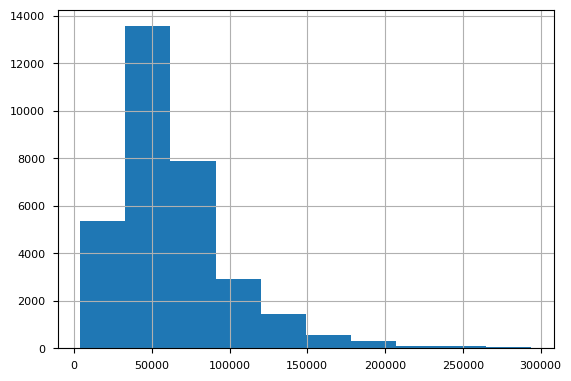

In [ ]:
# 혼자 압도적으로 높은 한 명 제외
df = df[df['person_income']<300000]
df['person_income'].hist()

In [ ]:
# 'cb_person_default_on_file' 열에서 'Y'라는 값은 1로, 'N'이라는 값은 0으로 변경합니다.
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace('Y', 1)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace('N', 0)

# 변경된 'cb_person_default_on_file' 열의 값을 출력합니다.
df['cb_person_default_on_file']

0        1
1        0
2        0
3        0
4        1
        ..
32574    1
32575    0
32576    0
32577    0
32579    0
Name: cb_person_default_on_file, Length: 32332, dtype: int64

In [ ]:
# 'person_emp_length' 이상치 및 결측치 확인
df.sort_values(by = 'person_emp_length', ascending= False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,0,4
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,0,23
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,1,24
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
32274,38,30132,RENT,NaN,MEDICAL,C,3000,13.85,1,0.10,1,14
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,0,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,1,20
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,0,18


In [ ]:
# 'per_emp_length' 가 nan인 사람들은 모두 중앙값 대체

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df.sort_values(by = 'person_emp_length', ascending= False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,0,4
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,0,23
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,1,24
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0,0.25,0,3
2873,23,65004,RENT,0.0,VENTURE,C,3000,13.61,0,0.05,1,3
6522,25,39396,RENT,0.0,VENTURE,D,6000,15.31,1,0.15,1,3
27780,29,201000,MORTGAGE,0.0,VENTURE,B,18000,11.83,0,0.09,0,10


<Axes: >

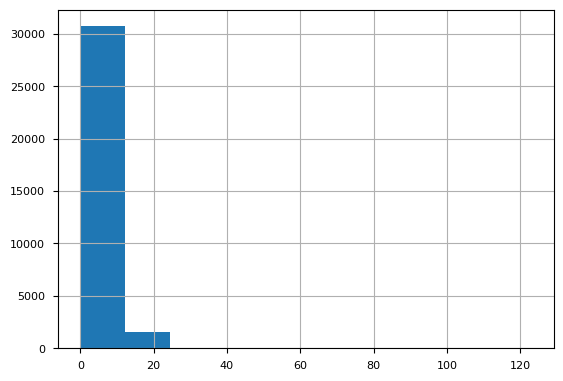

In [ ]:
# 'person_emp_length' 열의 값을 히스토그램으로 시각화합니다.
df['person_emp_length'].hist()

<Axes: >

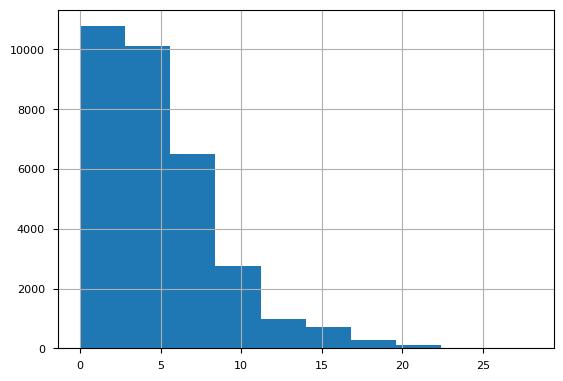

In [ ]:
# 100 이상 이상치 제거
df = df[df['person_emp_length']<=30]
df['person_emp_length'].hist()

In [ ]:
# 'loan_int_rate' 열의 결측치를 해당 열의 중앙값으로 대체합니다.
# 대출 등급이 낮을수록 이자율이 높다고 가정합니다.
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [ ]:
# 'loan_grade' 열의 값을 숫자로 인코딩하기 위해 딕셔너리를 설정합니다.
temp_dict = {"A": 7, "B": 6, "C": 5, "D": 4, "E": 3, "F": 2, "G": 1}

# 'loan_grade' 열의 값을 temp_dict에 따라 매핑하여 숫자로 변환합니다.
df["loan_grade"] = df['loan_grade'].map(temp_dict)

# 변경된 'loan_grade' 열의 고유한 값들을 출력합니다.
df['loan_grade'].unique()

array([6, 5, 7, 4, 3, 2, 1])

데이터프레임(df)에서 월급 정보를 제공하지 않기 때문에,

'person_income'(연봉) 열을 기반으로 월급을 계산하여 새로운 'month_income' 열을 생성합니다.

In [ ]:
# 'person_income' 열을 12로 나눠 월급을 계산하여 새로운 'month_income' 열을 생성합니다.
df['month_income'] = df['person_income'] / 12

# 'month_income' 열의 값을 정수로 변환합니다.
df['month_income'] = df['month_income'].astype(int)

# 변경된 데이터프레임(df)를 출력합니다.
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,month_income
1,21,9600,OWN,5.0,EDUCATION,6,1000,11.14,0,0.10,0,2,800
2,25,9600,MORTGAGE,1.0,MEDICAL,5,5500,12.87,1,0.57,0,3,800
3,23,65500,RENT,4.0,MEDICAL,5,35000,15.23,1,0.53,0,2,5458
4,24,54400,RENT,8.0,MEDICAL,5,35000,14.27,1,0.55,1,4,4533
5,21,9900,OWN,2.0,VENTURE,7,2500,7.14,1,0.25,0,2,825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,RENT,4.0,PERSONAL,4,20000,15.58,1,0.31,1,19,5417
32575,52,64500,RENT,0.0,EDUCATION,6,5000,11.26,0,0.08,0,20,5375
32576,57,53000,MORTGAGE,1.0,PERSONAL,5,5800,13.16,0,0.11,0,30,4416
32577,54,120000,MORTGAGE,4.0,PERSONAL,7,17625,7.49,0,0.15,0,19,10000


In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
month_income                    int64
dtype: object

 'person_home_ownership' 및 'loan_intent' 두 열에 대해 원-핫 인코딩을 수행하는 코드입니다.

 원-핫 인코딩은 범주형 변수를 모델이 이해하기 쉬운 형태로 변환하는 데 사용되는 방식입니다.

 판다스의 get_dummies() 함수를 사용하여 원-핫 인코딩을 적용하고,

 변경된 데이터프레임(df)를 출력하여 새롭게 생성된 열을 확인합니다.

In [ ]:
# 'person_home_ownership'와 'loan_intent' 열에 대해 원-핫 인코딩을 수행합니다.
df = pd.get_dummies(df)

# 변경된 데이터프레임(df)를 출력합니다.
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,6,1000,11.14,0,0.10,0,2,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5,5500,12.87,1,0.57,0,3,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,5,35000,15.23,1,0.53,0,2,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,5,35000,14.27,1,0.55,1,4,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,7,2500,7.14,1,0.25,0,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,4.0,4,20000,15.58,1,0.31,1,19,...,0,0,0,1,0,0,0,0,1,0
32575,52,64500,0.0,6,5000,11.26,0,0.08,0,20,...,0,0,0,1,0,1,0,0,0,0
32576,57,53000,1.0,5,5800,13.16,0,0.11,0,30,...,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,7,17625,7.49,0,0.15,0,19,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,6,1000,11.14,0,0.10,0,2,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5,5500,12.87,1,0.57,0,3,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,5,35000,15.23,1,0.53,0,2,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,5,35000,14.27,1,0.55,1,4,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,7,2500,7.14,1,0.25,0,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,4.0,4,20000,15.58,1,0.31,1,19,...,0,0,0,1,0,0,0,0,1,0
32575,52,64500,0.0,6,5000,11.26,0,0.08,0,20,...,0,0,0,1,0,1,0,0,0,0
32576,57,53000,1.0,5,5800,13.16,0,0.11,0,30,...,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,7,17625,7.49,0,0.15,0,19,...,1,0,0,0,0,0,0,0,1,0


## Modeling

주어진 데이터를 타겟 변수와 특성 변수로 분리하고, 훈련 세트, 검증 세트, 테스트 세트로 나누는 과정입니다.

이 비율은 각각 0.6, 0.2, 0.2로 설정하고 랜덤 시드를 2021로 고정하여 데이터를 분할합니다.

이후 각 데이터 세트의 X와 y를 분리하고, 최종적으로 구성된 각 데이터 세트의 형태를 출력하여 확인합니다.

In [ ]:
# 타겟 변수 및 특성 변수 설정
target = 'loan_status'
features = df.drop(columns=target).columns

# 데이터를 훈련 세트, 검증 세트, 테스트 세트로 나누기 (비율:  0.2 / 0.2 / 0.6)
train, test = train_test_split(df, test_size=0.2, random_state=2021, stratify=df[target])
train, val = train_test_split(train, test_size=0.2, random_state=2021, stratify=train[target])

# X와 y 데이터 분리하기
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# 최종적인 데이터 세트의 모양 출력 (각 세트의 행과 열 개수)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20687, 20), (20687,), (5172, 20), (5172,), (6465, 20), (6465,))

### Model 1 . XGBClassifier

XGBoost 분류기를 사용하는 파이프라인을 생성하고, 하이퍼파라미터 튜닝을 위해 RandomizedSearchCV를 사용하는 과정입니다.

튜닝할 하이퍼파라미터의 값들은 param 딕셔너리에 설정되어 있습니다.

RandomizedSearchCV는 주어진 파라미터 분포에 따라 무작위로 조합을 생성하여 교차 검증을 통해 학습을 진행합니다.

최종적으로 훈련 데이터에 최적의 하이퍼파라미터 조합을 찾은 모델을 학습시키고 결과를 반환합니다.

In [ ]:
# XGBoost 분류기를 사용한 파이프라인 생성
pipe = Pipeline([
    ('xgb', XGBClassifier(eval_metric='auc',  # AUC를 평가 지표로 사용
                           random_state=2021,
                           objective='binary:logistic',
                           n_jobs=-1))
])

# 튜닝할 하이퍼파라미터의 값들 설정
param = {
    'xgb__n_estimators': randint(100, 1000),
    'xgb__learning_rate': uniform(0.01, 1),
    'xgb__max_depth': randint(3, 10),
    'xgb__sub_sample': uniform(0.01, 1),
    'xgb__colsample_bytree': uniform(0.1, 1),
    'xgb__scale_pos_weight': uniform(0.1, 1)
}

# RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝 수행
clf = RandomizedSearchCV(
    pipe,
    param_distributions=param,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 훈련 데이터에 적합(CV를 통한 튜닝 후 최적 파이프라인 학습)
clf.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[17:59:29] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='auc',
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interaction_constr...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f70e4961f00>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f70e4473eb0>,
                                        'xgb__scale_pos_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f70e450c580>,
                                        'xgb__sub_sample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f70e450db10>},
                   verbose=1)

RandomizedSearchCV를 통해 찾은 최적의 하이퍼파라미터와 관련한 최고 점수를 출력합니다.

이를 통해 어떤 하이퍼파라미터 조합이 가장 좋은 성능을 보였는지 확인할 수 있습니다.

최적 점수는 교차 검증에서의 평균 성능 지표를 나타냅니다.

In [ ]:
# RandomizedSearchCV에서 찾은 최적의 하이퍼파라미터와 관련한 최고 점수 출력
print('Best Parameter:', clf.best_params_)
print('Best Score:', clf.best_score_)


Best Parameter: {'xgb__colsample_bytree': 0.8307857362666569, 'xgb__learning_rate': 0.1251949691673856, 'xgb__max_depth': 6, 'xgb__n_estimators': 305, 'xgb__scale_pos_weight': 0.3319963346162218, 'xgb__sub_sample': 0.35745605157177884}
Best Score: 0.9348382572080265


RandomizedSearchCV에서 찾은 최적의 모델을 사용하여 훈련 데이터와 검증 데이터에 대한 예측값을 생성합니다.

그리고 예측값과 실제값을 비교하여 정확도와 ROC-AUC 점수를 계산하여 모델의 성능을 평가합니다.

정확도는 모델이 올바르게 예측한 결과의 비율을 나타내고, ROC-AUC 점수는 모델이 얼마나 잘 분류를 수행하는지를 평가하는 지표입니다.

In [ ]:
# 최적의 모델로 예측값 생성
model = clf.best_estimator_
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# 정확도와 ROC-AUC 점수 출력
print('Accuracy Score:', accuracy_score(y_val, y_pred_val))
print('ROC-AUC Score:', roc_auc_score(y_val, y_pred_val))


Accuracy Score: 0.9373549883990719
ROC-AUC Score: 0.8580373453271081


### Model 2. Random Forest

In [ ]:

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from category_encoders import TargetEncoder
# from scipy.stats import randint
# from sklearn.impute import SimpleImputer

# # 파이프라인에 Imputer 추가
# pipe2 = Pipeline([
#     ('preprocessing', TargetEncoder()),
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('rf', RandomForestClassifier(
#         random_state=2021,
#         class_weight='balanced',
#         n_jobs=-1
#     ))
# ])

# param2 = {
#     'preprocessing__smoothing': [50., 100., 300., 500., 800., 1000.],
#     'preprocessing__min_samples_leaf': list(range(1, 10)),
#     'rf__n_estimators': list(range(100, 500)),
#     'rf__max_depth': list(range(3, 10)),
#     'rf__min_samples_split': list(range(3, 20)),
#     'rf__min_samples_leaf': list(range(3, 20)),
# }

# clf2 = RandomizedSearchCV(
#     pipe2,
#     param_distributions=param2,
#     n_iter=50,
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )

# clf2.fit(X_train, y_train)


In [ ]:
# print('Best Parameter :', clf2.best_params_)
# print('Best Score : ', (clf2.best_score_))

In [ ]:
# model2 = clf2.best_estimator_
# y_pred_train2 = model2.predict(X_train)
# y_pred_val2 = model2.predict(X_val)

# print ('accuracy socre', accuracy_score(y_val, y_pred_val2))
# print ('roc_auc_score ', roc_auc_score(y_val, y_pred_val2))

### Model 3. LightGBM

In [ ]:
# pipe3 = Pipeline([
#                  ('preprocessing', OrdinalEncoder()),
#                  ('lgbm', LGBMClassifier(
#                                       random_state = 2021,
#                                       objective = 'binary',
#                                       eval_metric = 'auc',
#                                       n_jobs = -1))])

# param3 = {
#             'lgbm__n_estimators': randint(100,1000),
#             'lgbm__learning_rate': uniform(0.01,0.2),
#             'lgbm__max_depth' : randint(3,10),
#             'lgbm__boosting' : ['gbdt','rf','dart','goss'],
#             'lgbm__colsample_bytree': uniform(0.1,1),
#             'lgbm__scale_pos_weight' : uniform(0.1,1)}


# clf3 = RandomizedSearchCV(
#     pipe3,
#     param_distributions=param3,
#     n_iter=50,
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )

# clf3.fit(X_train, y_train);

In [ ]:
# print('Best Parameter :', clf3.best_params_)
# print('Best Score : ', (clf3.best_score_))

In [ ]:
# model3 = clf3.best_estimator_
# y_pred_train3 = model3.predict(X_train)
# y_pred_val3 = model3.predict(X_val)

# print ('accuracy socre', accuracy_score(y_val, y_pred_val3))
# print ('roc_auc_score ', roc_auc_score(y_val, y_pred_val3))

### Model 1 . XGBClassifier 의 성능이 가장 좋으로 test 데이터 적용

In [ ]:
# 최적의 모델로 예측값 생성
model = clf.best_estimator_
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 정확도와 ROC-AUC 점수 출력
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_test))


Accuracy Score: 0.9384377416860016
ROC-AUC Score: 0.863083745232854


이 모델을 활용하여 개인의 정보를 토대로 신용 부도를 예측할 수 있습니다.


## 시각화

### Shap

최적의 모델에서 전처리 및 XGBoost 분류기 단계를 추출하고, 테스트 데이터의 인덱스를 저장합니다.

여기서 전처리 단계('preprocessing')는 주석처리되어 있지만, 전처리를 추가할 경우 이를 참고할 수 있습니다.

XGBoost 분류기 단계를 추출하여 모델의 이후 분석 및 활용에 사용할 수 있습니다.

테스트 데이터의 인덱스도 저장해두어 결과 분석 시 사용합니다.

In [ ]:
# 전처리 및 XGBoost 분류기 단계 추출 (주석처리된 코드는 사용되지 않았지만, 전처리 단계를 추가한 경우 참조할 수 있음)
# encoder = model.named_steps['preprocessing']
# X_test_en = model.named_steps['preprocessing'].transform(X_val)
xgb = model.named_steps['xgb']

# 테스트 데이터의 인덱스 가져오기
test_id = X_test.index


In [ ]:
# XGBoost 분류기를 사용하여 테스트 데이터에 대한 예측 확률 값 계산 및 양성 클래스(1)에 속할 확률 값 저장
y_pred_proba = xgb.predict_proba(X_test)[:,1]

In [ ]:
# XGBoost 분류기를 사용하여 테스트 데이터의 200번째 행에 대한 예측값 계산
#테스트 데이터셋 안의 개별 행에 대한 예측 결과를 얻을 수 있습니다
row = X_test.iloc[[200]]
xgb.predict(row)

array([1])

SHAP 라이브러리를 사용하여 XGBoost 분류기 모델에 대한 예측 영향력을 확인하고 시각화합니다.

먼저 shap.TreeExplainer를 사용하여 XGBoost 모델을 설명하고, 전달한 'row'에 대한 SHAP 값을 구합니다.

그 다음, interactive 시각화를 위해 shap.initjs()를 호출합니다.

마지막으로, 이러한 SHAP 값들을 강제 플롯(force plot)을 사용하여 시각화합니다.

시각화에 따르면 각 기능이 예측에 어떤 정도의 영향을 미쳤는지 확인할 수 있습니다.

In [ ]:
# SHAP 트리 설명자 생성 및 예측에 영향을 미친 정도 확인
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

# SHAP 그래프 초기화
shap.initjs()

# SHAP 값들을 강제 플롯을 사용하여 시각화
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit'
)



XGBoost 분류기를 사용하여 피처의 중요도를 계산합니다.

결과는 pandas Series 형태로 저장됩니다.

그런 다음 가장 중요한 상위 N개(n=5)의 피처를 시각화 할 수 있도록 설정하고, 올바른 막대 그래프로 표시됩니다.

이를 통해 각 피처가 모델의 예측 성능에 미치는 영향을 이해할 수 있습니다.

<Axes: title={'center': 'Top 5 features'}>

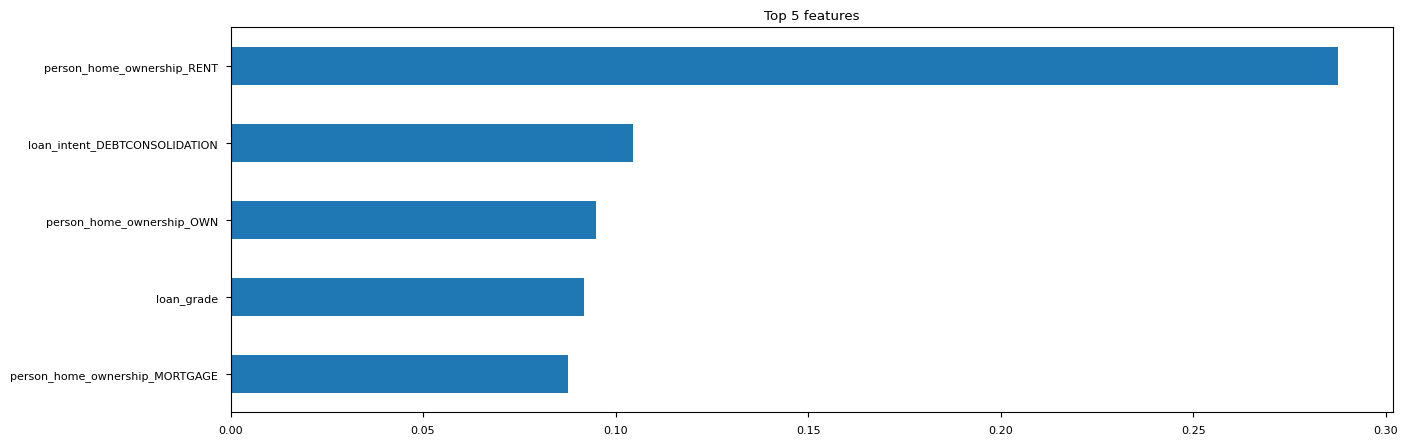

In [ ]:
# 변수 중요도 계산
importances = pd.Series(xgb.feature_importances_, X_train.columns)

# 상위 5개 피처 시각화 설정
n = 5
plt.figure(figsize=(15, n))
plt.title(f'Top {n} features')

# 상위 5개 피처를 막대 그래프로 표시
importances.sort_values()[-n:].plot.barh()

## PDP

In [ ]:
 df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,6,1000,11.14,0,0.10,0,2,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5,5500,12.87,1,0.57,0,3,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,5,35000,15.23,1,0.53,0,2,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,5,35000,14.27,1,0.55,1,4,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,7,2500,7.14,1,0.25,0,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,4.0,4,20000,15.58,1,0.31,1,19,...,0,0,0,1,0,0,0,0,1,0
32575,52,64500,0.0,6,5000,11.26,0,0.08,0,20,...,0,0,0,1,0,1,0,0,0,0
32576,57,53000,1.0,5,5800,13.16,0,0.11,0,30,...,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,7,17625,7.49,0,0.15,0,19,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# 피처 간의 상관계수 계산
df.corr()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
person_age,1.000000,0.108214,0.170031,-0.010427,0.043516,0.009448,-0.022533,-0.038703,0.002173,0.872669,...,0.034569,-0.010404,0.000115,-0.032902,-0.005420,-0.092294,0.084249,0.016422,0.025564,-0.009389
person_income,0.108214,1.000000,0.186705,0.011383,0.406035,-0.009346,-0.221562,-0.343991,-0.014374,0.086647,...,0.306962,0.004363,-0.066614,-0.266626,0.000440,-0.010576,0.072135,-0.058728,0.003504,0.007817
person_emp_length,0.170031,0.186705,1.000000,0.047773,0.108124,-0.054033,-0.086397,-0.055938,-0.029539,0.144555,...,0.224922,-0.014895,0.023153,-0.232192,-0.003105,-0.037616,0.031800,-0.003735,0.009363,0.010827
loan_grade,-0.010427,0.011383,0.047773,1.000000,-0.144912,-0.889924,-0.373852,-0.125298,-0.536595,-0.011430,...,0.115748,-0.016946,0.017308,-0.121346,-0.000070,0.008926,-0.029016,-0.001931,0.006008,0.010683
loan_amnt,0.043516,0.406035,0.108124,-0.144912,1.000000,0.138671,0.106915,0.585256,0.037964,0.033830,...,0.127735,0.011517,-0.026638,-0.112639,-0.000108,-0.007110,0.042609,-0.025252,-0.001563,-0.000198
loan_int_rate,0.009448,-0.009346,-0.054033,-0.889924,0.138671,1.000000,0.320104,0.116681,0.476528,0.013631,...,-0.129095,0.015663,-0.013373,0.132503,-0.004044,-0.009538,0.018844,0.007530,-0.000880,-0.008467
loan_status,-0.022533,-0.221562,-0.086397,-0.373852,0.106915,0.320104,1.000000,0.378879,0.178681,-0.016993,...,-0.187622,0.013207,-0.102016,0.238284,0.071215,-0.055683,0.037001,0.056302,-0.020542,-0.078028
loan_percent_income,-0.038703,-0.343991,-0.055938,-0.125298,0.585256,0.116681,0.378879,1.000000,0.037226,-0.027746,...,-0.145436,0.012876,0.052108,0.113522,0.003335,-0.001195,-0.015118,0.012485,-0.003667,0.001343
cb_person_default_on_file,0.002173,-0.014374,-0.029539,-0.536595,0.037964,0.476528,0.178681,0.037226,1.000000,-0.000061,...,-0.061912,0.013653,-0.004225,0.061665,0.002888,-0.006643,0.016029,-0.002421,-0.003521,-0.003085
cb_person_cred_hist_length,0.872669,0.086647,0.144555,-0.011430,0.033830,0.013631,-0.016993,-0.027746,-0.000061,1.000000,...,0.024466,-0.008182,0.005669,-0.026212,-0.007675,-0.076785,0.062567,0.013651,0.027943,-0.005118


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#!pip install --upgrade scikit-learn

scikit-learn의 파셜 의존성(Partial Dependence) 분석 도구를 임포트하는 코드입니다.

PartialDependenceDisplay와 partial_dependence는 특정 피처가 모델의 예측 결과에 어떻게 영향을 미치는지 설명하는 데 사용되는 도구로,

이들을 사용하여 원하는 피처에 대한 파셜 의존성 플롯을 생성할 수 있습니다.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

plt.figure를 사용하여 파셜 의존성 플롯(Partial Dependence Plot)의 크기를 설정합니다.

'PartialDependenceDisplay.from_estimator()' 함수를 사용하여 주어진 모델과 테스트 데이터를 바탕으로 'person_emp_length' 피처의 파셜 의존성 플롯을 생성하고 시각화합니다.

이를 통해 'person_emp_length' 피처가 예측 결과에 미치는 영향을 관찰할 수 있습니다.

<Figure size 1000x1000 with 0 Axes>

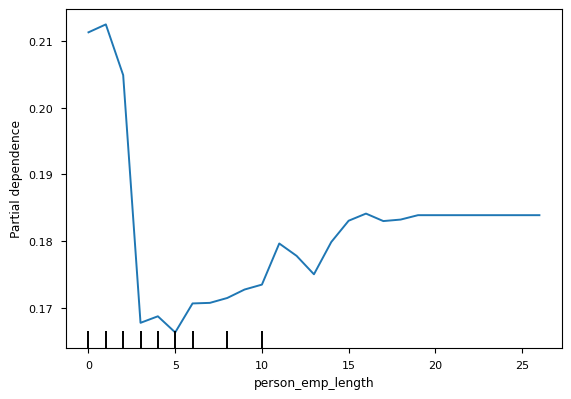

In [ ]:
# 파셜 의존성 플롯(PDP) 크기 설정
plt.figure(figsize=(10, 10))

# 파셜 의존성 플롯 생성 및 시각화
PartialDependenceDisplay.from_estimator(model, X_test, features=['person_emp_length'], target=target)


 모델의 피처인 'person_emp_length'의 값을 변화시키며 모델의 예측값을 계산하고 파셜 의존성 플롯을 생성합니다.

 'person_emp_length' 범위를 만든 다음, 각 값에 대한 모델의 예측값을 계산하고 저장하려는 빈 리스트를 만듭니다.

 이후, 각 'person_emp_length' 값에 대한 예측값 계산이 완료되면 플롯을 생성하고 시각화합니다

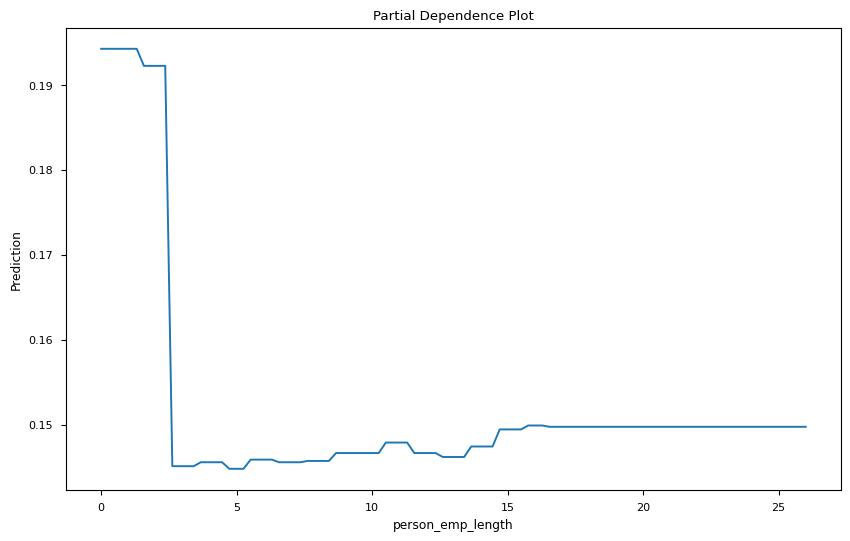

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 가정: 'model'은 훈련된 scikit-learn 모델이고 'X_test'는 테스트 데이터를 포함하는 데이터프레임입니다
# 'person_emp_length'는 시각화하려는 피처입니다

feature_name = 'person_emp_length'  # 실제 데이터프레임의 피처 이름으로 바꿔주세요

# 'person_emp_length'의 값 범위 생성
feature_values = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), num=100)

# 각 'person_emp_length' 값에 대한 예측을 저장할 빈 리스트 생성
predictions = []

# 각 'person_emp_length' 값에 대한 모델 예측 계산
for value in feature_values:
    X_temp = X_test.copy()
    X_temp[feature_name] = value
    prediction = model.predict(X_temp)
    predictions.append(np.mean(prediction))

# 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(feature_values, predictions)
plt.xlabel(feature_name)
plt.ylabel('Prediction')
plt.title('Partial Dependence Plot')
plt.show()


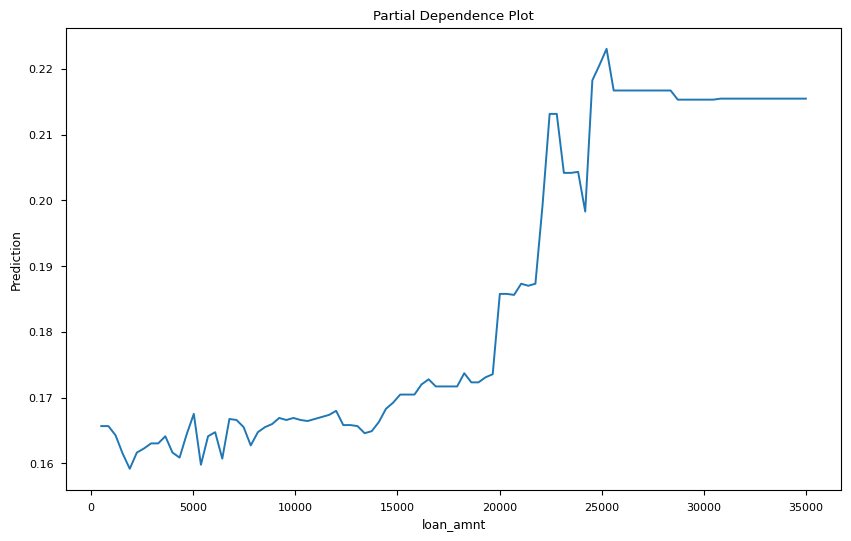

In [ ]:


feature = 'loan_amnt'
features = X_test.columns

# 'loan_amnt' 피처의 값 범위 생성
feature_values = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 각 'loan_amnt' 값에 대한 예측을 저장할 빈 리스트 생성
predictions = []

# 각 'loan_amnt' 값에 대한 모델 예측을 계산
for value in feature_values:
    X_temp = X_test.copy()
    X_temp[feature] = value
    prediction = model.predict(X_temp)
    predictions.append(np.mean(prediction))

# 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(feature_values, predictions)
plt.xlabel(feature)
plt.ylabel('Prediction')
plt.title('Partial Dependence Plot')
plt.show()


대출 금액이 클수록 신용 부도의 확률이 높아집니다.

두 피처('loan_amnt' 및 'person_home_ownership_OWN')를 대상으로 파셜 의존성을 계산하고 시각화합니다.

각 피처에 대한 값을 생성한 다음, 각 피처 값 조합에 대한 모델의 예측을 계산합니다.

계산이 완료된 후에 파셜 의존성 표면 시각화를 생성하고 표시합니다.

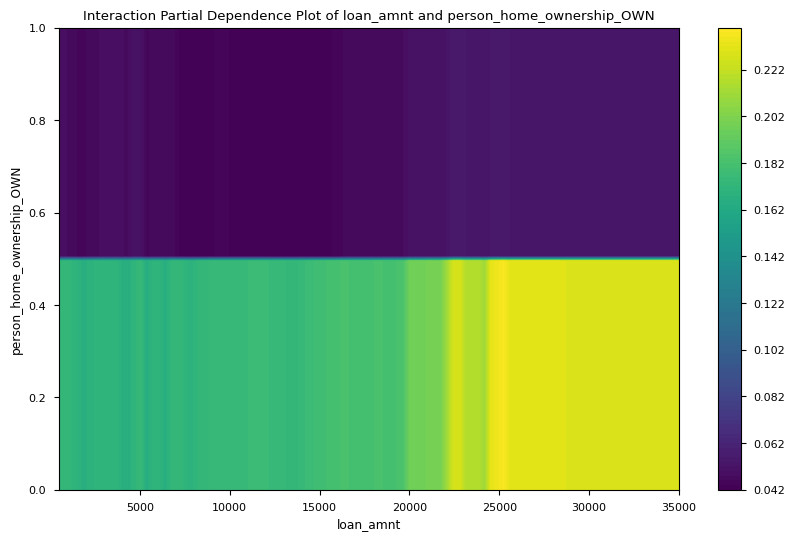

In [ ]:

from pdpbox import pdp

features = ['loan_amnt', 'person_home_ownership_OWN']
feature_values = {}

# 각 특성에 대한 특성 값 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 두 특성 값에 대한 예측을 저장할 빈 리스트 생성
predictions = np.empty((100, 100))

# 각 특성 값 쌍에 대해 모델 예측 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        X_temp = X_test.copy()
        X_temp[features[0]] = value1
        X_temp[features[1]] = value2
        prediction = model.predict(X_temp)
        predictions[j, i] = np.mean(prediction)

# 상호작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()

In [ ]:

# features = ['loan_amnt', 'person_home_ownership_OWN' ]
# interaction = pdpbox.info_plots.InteractTargetPlot(
#     model=model,
#     dataset=X_test,
#     model_features=X_test.columns,
#     features=features
# )
# pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

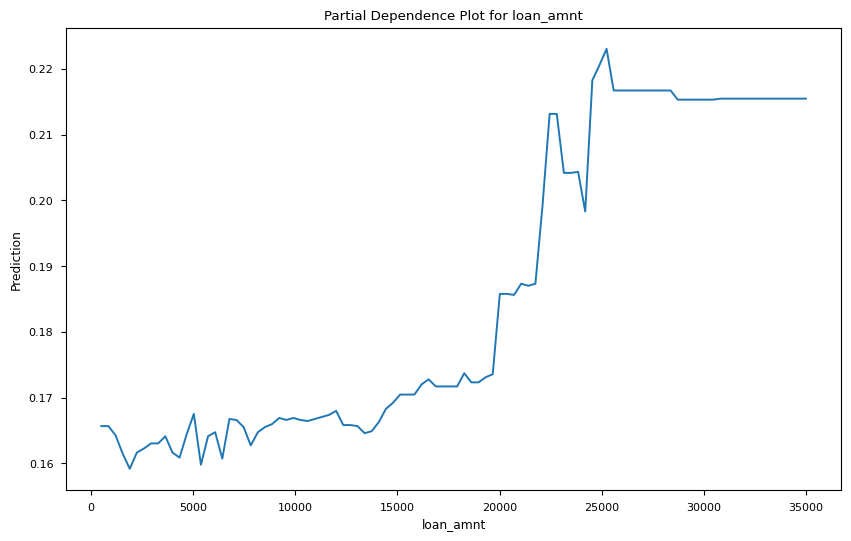

In [ ]:
if 'person_home_ownership_RENT' in X_test.columns:
    # 특성이 데이터셋에 있는 경우에만 그래프 생성
    feature =  'loan_amnt'
    features = 'person_home_ownership_RENT'

    # Generate values for the 'person_home_ownership_RNET' feature
    feature_values = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

    # Create an empty list to store the predictions for each value of 'person_home_ownership_RNET'
    predictions = []

    # Calculate the model's prediction for each value of 'person_home_ownership_RNET'
    for value in feature_values:
        X_temp = X_test.copy()
        X_temp[feature] = value
        prediction = model.predict(X_temp)
        predictions.append(np.mean(prediction))

    # Plot the partial dependence plot
    plt.figure(figsize=(10, 6))
    plt.plot(feature_values, predictions)
    plt.xlabel(feature)
    plt.ylabel('Prediction')
    plt.title('Partial Dependence Plot for {}'.format(feature))
    plt.show()
else:
    print("'person_home_ownership_RNET' feature is not present in the dataset.")


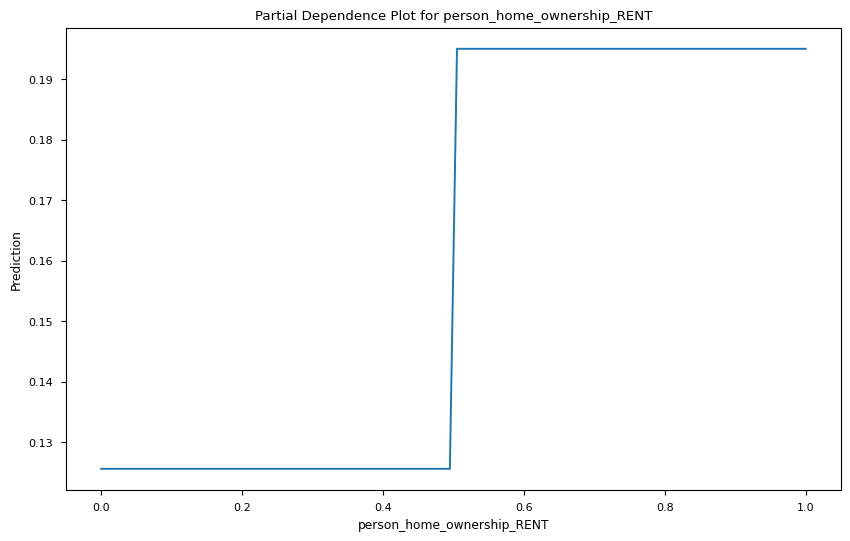

In [ ]:


feature = 'person_home_ownership_RENT'
features = X_test.columns

# Generate values for the 'person_home_ownership_RNET' feature
feature_values = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# Create an empty list to store the predictions for each value of 'person_home_ownership_RNET'
predictions = []

# Calculate the model's prediction for each value of 'person_home_ownership_RNET'
for value in feature_values:
    X_temp = X_test.copy()
    X_temp[feature] = value
    prediction = model.predict(X_temp)
    predictions.append(np.mean(prediction))

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.plot(feature_values, predictions)
plt.xlabel(feature)
plt.ylabel('Prediction')
plt.title('Partial Dependence Plot for {}'.format(feature))
plt.show()


In [ ]:
# # 렌트의 형태로 집을 보유한 유형이 예측에 끼친 영향
# feature = 'person_home_ownership_RNET'
# features = X_test.columns
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features, feature=feature)
# pdp.pdp_plot(pdp_dist, feature);

집을 렌트 형식으로 사는 사람일수록 부도위험이 높다.

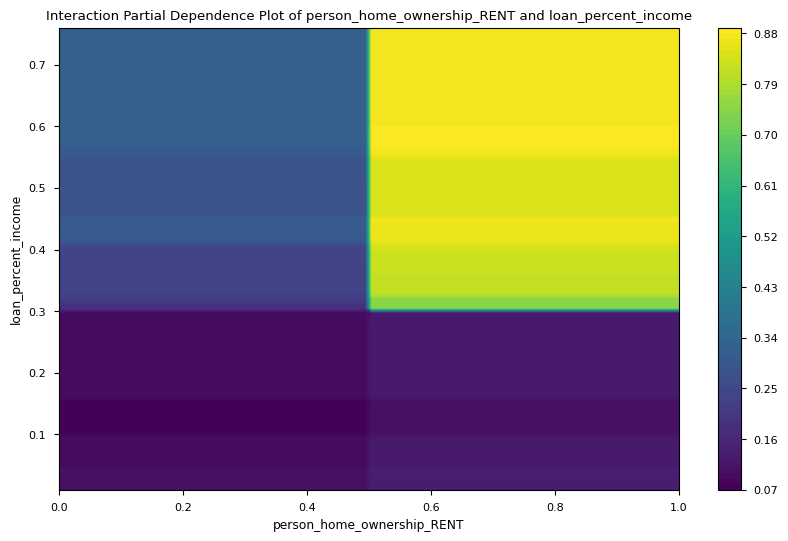

In [ ]:
features = ['person_home_ownership_RENT', 'loan_percent_income']
feature_values = {}

# 각 특성에 대한 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 두 특성 값에 대한 예측을 저장할 빈 리스트 생성
predictions = np.empty((100, 100))

# 각 특성 값 쌍에 대한 모델 예측 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        X_temp = X_test.copy()
        X_temp[features[0]] = value1
        X_temp[features[1]] = value2
        prediction = model.predict(X_temp)
        predictions[j, i] = np.mean(prediction)

# 상호작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()


집을 RENT 형태로 소유하고 있는 사람들 중, 소득 대비 부채 비율이 높을수록 부도 확률이 상승하는 것을 확인할 수 있습니다.

In [ ]:
df

In [ ]:
if 'person_home_ownership_MORTGAGE' in X_test.columns:
    # 특성이 데이터셋에 있는 경우에만 그래프 생성
    feature = 'person_home_ownership_MORTGAGE'
    features = X_test.columns

    # 'person_home_ownership_MORTGAGE' 특성값을 생성
    feature_values = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

    # 각 'person_home_ownership_MORTGAGE' 값에 대한 예측을 저장할 빈 리스트 생성
    predictions = []

    # 각 'person_home_ownership_MORTGAGE' 값에 대해 모델 예측을 계산하고 예측 리스트에 저장
    for value in feature_values:
        X_temp = X_test.copy()
        X_temp[feature] = value
        prediction = model.predict(X_temp)
        predictions.append(np.mean(prediction))

    # 파셜 의존성 플롯 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(feature_values, predictions)
    plt.xlabel(feature)
    plt.ylabel('Prediction')
    plt.title('{}에 대한 파셜 의존성 플롯'.format(feature))
    plt.show()
else:
    print("'person_home_ownership_MORTGAGE' 특성이 데이터셋에 없습니다.")


In [ ]:
# # 관심 있는 특성을 설정 (여기서는 'person_home_ownership_MORTGAGE')
# feature = 'person_home_ownership_MORTGAGE'

# # 관심 있는 특성의 값을 설정 (이진 특성이므로 값은 0과 1)
# feature_values = [0, 1]

# # 각 특성 값에 대한 예측을 저장할 빈 리스트 생성
# predictions = []

# # 각 특성 값에 대해 모델 예측을 계산하고 예측 리스트에 저장
# for val in feature_values:
#     # X_test 데이터를 복사하여 X_temp 생성
#     X_temp = X_test.copy()
#     # 특성 값을 설정
#     X_temp[feature] = val
#     # 모델의 예측값 계산
#     prediction = model.predict(X_temp)
#     # 각 특성 값에 대한 예측의 평균을 리스트에 추가
#     predictions.append([val, np.mean(prediction)])

# # 리스트를 NumPy 배열로 변환
# predictions = np.array(predictions)

# # 파셜 의존성 플롯 그리기
# plt.figure(figsize=(8, 6))
# plt.scatter(predictions[:, 0], predictions[:, 1], c=predictions[:, 1], cmap='viridis')
# plt.xlabel(feature)
# plt.ylabel('Prediction')
# plt.title('Partial Dependence Plot')
# plt.show()


In [ ]:
# !pip install PDPbox==0.2.0
# from pdpbox import pdp, get_dataset

# feature = 'person_home_ownership_MORTGAGE'
# features = X_test.columns
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features, feature=feature)
# pdp.pdp_plot(pdp_dist, feature);

## 가장 부도 위험이 높은 고객 유형

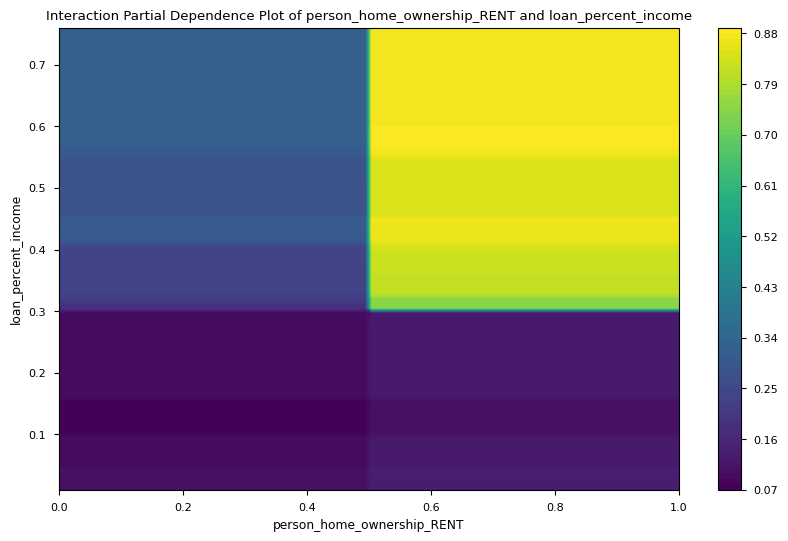

In [ ]:
# 조사하려는 특성 정의
features = ['person_home_ownership_RENT', 'loan_percent_income']
feature_values = {}

# 각 특성에 대한 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 각 특성 값 조합에 대한 예측을 저장할 빈 배열 생성
predictions = np.empty((100, 100))

# 각 특성 값 조합에 대한 모델 예측값 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        X_temp = X_test.copy()
        X_temp[features[0]] = value1
        X_temp[features[1]] = value2
        prediction = model.predict(X_temp)
        predictions[j, i] = np.mean(prediction)

# 상호 작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()


부채 통합을 의도로 대출을 하는 고객중 등급이 낮을수록 부도위험이 가장 높게 나타났다.

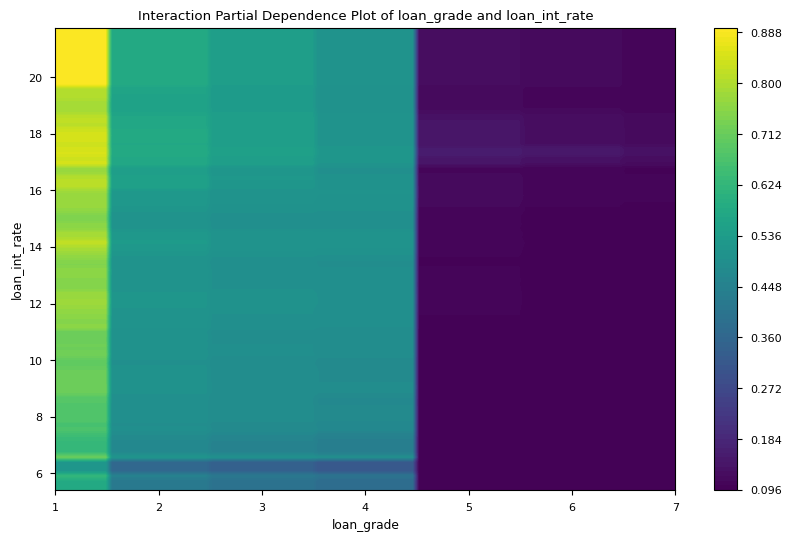

In [202]:
# 조사하려는 특성 정의
features = ['loan_grade', 'loan_int_rate']
feature_values = {}

# 각 특성에 대한 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 두 특성 값에 대한 예측을 저장할 빈 배열 생성
predictions = np.empty((100, 100))

# 각 특성 값 쌍에 대한 모델 예측 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        # X_test 데이터를 복사하여 테스트 데이터셋 생성
        X_temp = X_test.copy()
        # 현재 조합의 첫 번째 특성 값 할당
        X_temp[features[0]] = value1
        # 현재 조합의 두 번째 특성 값 할당
        X_temp[features[1]] = value2
        # 모델을 사용하여 예측값 계산
        prediction = model.predict(X_temp)
        # 예측값을 배열에 저장
        predictions[j, i] = np.mean(prediction)

# 상호작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()


In [ ]:
# features = ['loan_grade', 'loan_int_rate' ]
# interaction = pdp_interact(
#     model=model,
#     dataset=X_test,
#     model_features=X_test.columns,
#     features=features
# )
# pdp_interact_plot(interaction, plot_type='grid', feature_names=features)
# plt.xlim([0, 7])

이자율이 높고 대출 등급이 낮을수록 부도 확률이 높다.

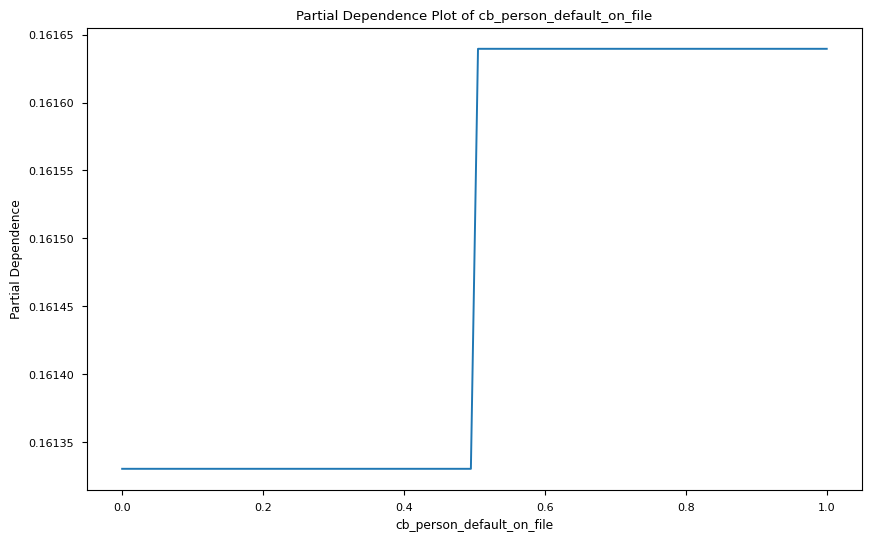

In [203]:
# 조사하려는 특성 정의
feature = 'cb_person_default_on_file'
features = X_test.columns

# 이 특성에 대한 범위 생성
feature_values = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 예측값을 저장할 빈 리스트 생성
predictions = np.empty(100)

# 각 특성 값에 대한 모델 예측 계산
for i, value in enumerate(feature_values):
    X_temp = X_test.copy()
    X_temp[feature] = value
    prediction = model.predict(X_temp)
    predictions[i] = np.mean(prediction)

# 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(feature_values, predictions)
plt.xlabel(feature)
plt.ylabel('Partial Dependence')
plt.title(f'Partial Dependence Plot of {feature}')
plt.show()


In [ ]:
# feature = 'cb_person_default_on_file'
# features = X_test.columns
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features, feature=feature)
# pdp.pdp_plot(pdp_dist, feature);

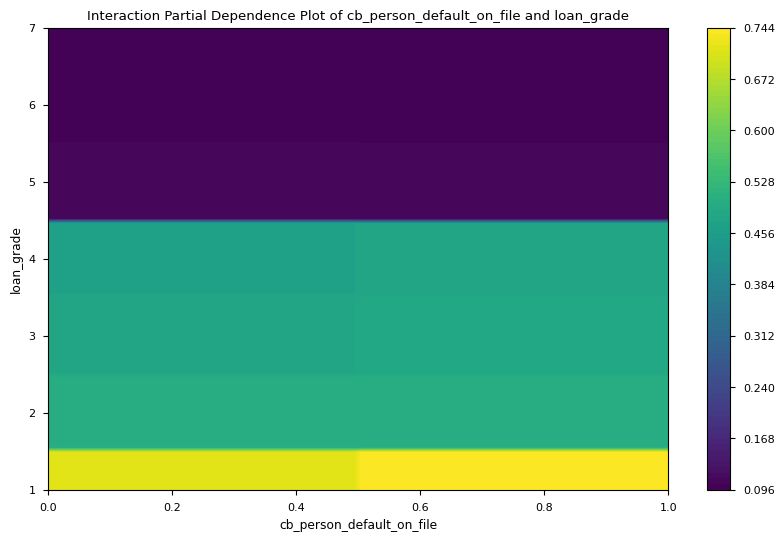

In [204]:
# 조사하려는 특성 정의
features = ['cb_person_default_on_file', 'loan_grade']
feature_values = {}

# 각 특성에 대한 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 두 특성 값에 대한 예측을 저장할 빈 배열 생성
predictions = np.empty((100, 100))

# 각 특성 값 쌍에 대한 모델 예측 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        # X_test 데이터를 복사하여 테스트 데이터셋 생성
        X_temp = X_test.copy()
        # 현재 조합의 첫 번째 특성 값 할당
        X_temp[features[0]] = value1
        # 현재 조합의 두 번째 특성 값 할당
        X_temp[features[1]] = value2
        # 모델을 사용하여 예측값 계산
        prediction = model.predict(X_temp)
        # 예측값을 배열에 저장
        predictions[j, i] = np.mean(prediction)

# 상호작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()


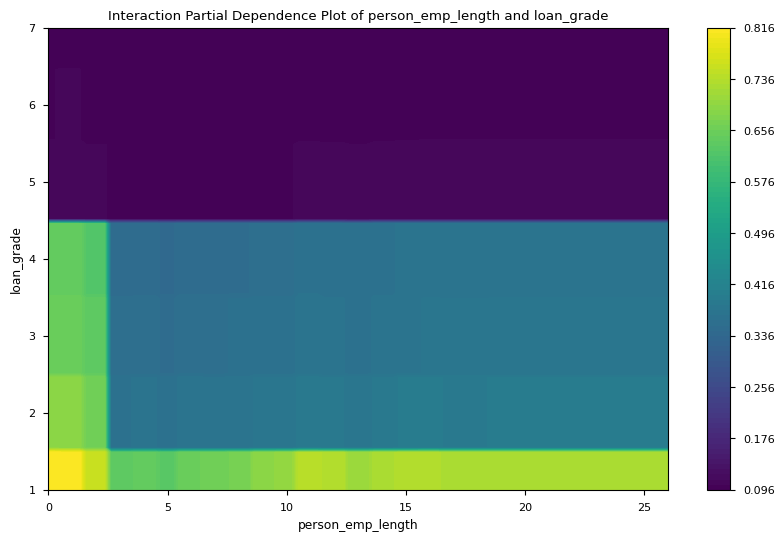

In [207]:
# 조사하려는 특성 정의
features = ['person_emp_length', 'loan_grade']
feature_values = {}

# 각 특성에 대한 범위 생성
for feature in features:
    feature_values[feature] = np.linspace(X_test[feature].min(), X_test[feature].max(), num=100)

# 두 특성 값에 대한 예측을 저장할 빈 배열 생성
predictions = np.empty((100, 100))

# 각 특성 값 쌍에 대한 모델 예측 계산
for i, value1 in enumerate(feature_values[features[0]]):
    for j, value2 in enumerate(feature_values[features[1]]):
        # X_test_en 데이터를 복사하여 테스트 데이터셋 생성
        X_temp = X_test.copy()
        # 현재 조합의 첫 번째 특성 값 할당
        X_temp[features[0]] = value1
        # 현재 조합의 두 번째 특성 값 할당
        X_temp[features[1]] = value2
        # 모델을 사용하여 예측값 계산
        prediction = model.predict(X_temp)
        # 예측값을 배열에 저장
        predictions[j, i] = np.mean(prediction)

# 상호작용 파셜 의존성 플롯 그리기
plt.figure(figsize=(10, 6))
plt.contourf(feature_values[features[0]], feature_values[features[1]], predictions, levels=100)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Interaction Partial Dependence Plot of {features[0]} and {features[1]}')
plt.colorbar()
plt.show()


In [ ]:
# features = ['person_emp_length', 'loan_grade']
# interaction = pdp_interact(
#     model=model,
#     dataset=X_test_en,
#     model_features=X_test_en.columns,
#     features=features
# )
# pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

In [208]:
# 상관관계 확인
df.corr()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
person_age,1.000000,0.108214,0.170031,-0.010427,0.043516,0.009448,-0.022533,-0.038703,0.002173,0.872669,...,0.034569,-0.010404,0.000115,-0.032902,-0.005420,-0.092294,0.084249,0.016422,0.025564,-0.009389
person_income,0.108214,1.000000,0.186705,0.011383,0.406035,-0.009346,-0.221562,-0.343991,-0.014374,0.086647,...,0.306962,0.004363,-0.066614,-0.266626,0.000440,-0.010576,0.072135,-0.058728,0.003504,0.007817
person_emp_length,0.170031,0.186705,1.000000,0.047773,0.108124,-0.054033,-0.086397,-0.055938,-0.029539,0.144555,...,0.224922,-0.014895,0.023153,-0.232192,-0.003105,-0.037616,0.031800,-0.003735,0.009363,0.010827
loan_grade,-0.010427,0.011383,0.047773,1.000000,-0.144912,-0.889924,-0.373852,-0.125298,-0.536595,-0.011430,...,0.115748,-0.016946,0.017308,-0.121346,-0.000070,0.008926,-0.029016,-0.001931,0.006008,0.010683
loan_amnt,0.043516,0.406035,0.108124,-0.144912,1.000000,0.138671,0.106915,0.585256,0.037964,0.033830,...,0.127735,0.011517,-0.026638,-0.112639,-0.000108,-0.007110,0.042609,-0.025252,-0.001563,-0.000198
loan_int_rate,0.009448,-0.009346,-0.054033,-0.889924,0.138671,1.000000,0.320104,0.116681,0.476528,0.013631,...,-0.129095,0.015663,-0.013373,0.132503,-0.004044,-0.009538,0.018844,0.007530,-0.000880,-0.008467
loan_status,-0.022533,-0.221562,-0.086397,-0.373852,0.106915,0.320104,1.000000,0.378879,0.178681,-0.016993,...,-0.187622,0.013207,-0.102016,0.238284,0.071215,-0.055683,0.037001,0.056302,-0.020542,-0.078028
loan_percent_income,-0.038703,-0.343991,-0.055938,-0.125298,0.585256,0.116681,0.378879,1.000000,0.037226,-0.027746,...,-0.145436,0.012876,0.052108,0.113522,0.003335,-0.001195,-0.015118,0.012485,-0.003667,0.001343
cb_person_default_on_file,0.002173,-0.014374,-0.029539,-0.536595,0.037964,0.476528,0.178681,0.037226,1.000000,-0.000061,...,-0.061912,0.013653,-0.004225,0.061665,0.002888,-0.006643,0.016029,-0.002421,-0.003521,-0.003085
cb_person_cred_hist_length,0.872669,0.086647,0.144555,-0.011430,0.033830,0.013631,-0.016993,-0.027746,-0.000061,1.000000,...,0.024466,-0.008182,0.005669,-0.026212,-0.007675,-0.076785,0.062567,0.013651,0.027943,-0.005118


In [209]:
train.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'month_income', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')